In [1]:
from information import *
from preprocessing import *
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from snfpy.snf import snf
import snf
from sklearn.cluster import spectral_clustering
import functions as ff
from sklearn.cluster import KMeans
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter
import numpy as np
import matplotlib.pyplot as plt

distance = ['euclidean','minkowski','cityblock','seuclidean','sqeuclidean','cosine','correlation','hamming','jensenshannon','chebyshev','canberra','braycurtis','mahalanobis','yule','matching','dice','kulczynski1','rogerstanimoto','russellrao','sokalmichener']
no_scale = ['vha_id', 'center_name', 'cancer_type']

def extract_features(df):
    return [i for i in df if i not in no_scale]
    

In [2]:
def scaling(df):
    # Create an instance of StandardScaler
    features_to_scale = extract_features(df)
    scaler = StandardScaler()

    # Fit the scaler to the selected features
    scaler.fit(df[features_to_scale])

    # Transform the selected features using the scaler
    scaled_features = scaler.transform(df[features_to_scale])

    # Create a new dataframe with the scaled features
    df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale)

    # Add the unscaled features to the new dataframe
    df_scaled[no_scale] = df[no_scale]
    return df_scaled

In [3]:
#handling numerical using standard scaler
df1 = pd.read_csv('data/Lung/numerical.csv', index_col=0)
df2 = pd.read_csv('data/Prostate/numerical.csv', index_col=0)

df1 = df1.fillna(0)
df2 = df2.fillna(0)

scaled_lung = scaling(df1)
scaled_prostate = scaling(df2)

In [4]:
scaled_prostate

,Rectum_V75Gy,LargeBowel_D0_035cc,Bladder - Bladder_Subtraction_Structure (Bladder - Bladder_Subtraction_Structure)_V65Gy,Rectum_V70Gy_15,Bladder_Already_Subtracted_V40Gy,AcuteGUTotal,SmallBowel_V45Gy,PTV_D2%,LateGUWithGrade,Bladder - Bladder_Subtraction_Structure (Bladder - Bladder_Subtraction_Structure)_V40Gy,...,Rectum_V70Gy,SmallBowel_D0_035cc,Bladder_Already_Subtracted_V65Gy,center_id,SmallBowel_DMax,AcuteGUWithGrade,AcuteGITotal,vha_id,center_name,cancer_type
0,0.707025,-0.723051,-0.305939,0.598829,-0.261041,3.968866,-0.190111,0.272649,-0.133829,-0.332038,...,0.598829,-0.530060,-0.228037,-1.568786,-0.531951,4.175981,0.523641,506-Prostate-01,Ann Arbor,Prostate
1,0.666237,1.505755,-0.305939,0.641770,-0.261041,2.176727,-0.190111,-0.483621,-0.133829,-0.332038,...,0.641770,-0.530060,-0.228037,-1.568786,-0.531951,1.642976,-0.619256,506-Prostate-02,Ann Arbor,Prostate
2,0.892620,-0.723051,-0.305939,0.941334,-0.261041,3.072796,-0.190111,-0.963609,-0.133829,-0.332038,...,0.941334,-0.530060,-0.228037,-1.568786,-0.531951,2.656178,-0.619256,506-Prostate-03,Ann Arbor,Prostate
3,1.608283,-0.723051,-0.305939,1.630190,-0.261041,4.267555,-0.190111,0.079457,-0.133829,-0.332038,...,1.630190,-0.530060,-0.228037,-1.568786,-0.531951,3.669380,3.380886,506-Prostate-04,Ann Arbor,Prostate
4,1.289310,-0.723051,-0.305939,1.084466,-0.261041,3.670176,-0.190111,0.574796,-0.133829,-0.332038,...,1.084466,-0.530060,-0.228037,-1.568786,-0.531951,4.175981,-0.619256,506-Prostate-05,Ann Arbor,Prostate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,0.353186,1.911916,-0.305939,0.744043,-0.261041,-0.212792,1.433387,0.795970,-0.133829,-0.332038,...,0.744043,2.366442,-0.228037,1.625993,2.356716,-0.383427,2.809437,695-Prostate-17,Milwaukee,Prostate
761,-0.197051,1.340859,-0.305939,-0.071943,-0.261041,1.579347,0.438665,0.504585,-0.133829,-0.332038,...,-0.071943,2.156181,-0.228037,1.625993,2.117446,-0.383427,2.809437,695-Prostate-19,Milwaukee,Prostate
762,-0.427615,0.715340,-0.305939,1.429117,-0.261041,0.683277,-0.190111,-0.260604,-0.133829,-0.332038,...,1.429117,-0.190649,-0.228037,1.625993,-0.195670,-0.383427,-0.047807,695-Prostate-20,Milwaukee,Prostate
763,-1.111080,-0.543118,0.444433,-1.300010,-0.261041,-0.511482,-0.190111,-0.437571,-0.133829,1.298962,...,-1.300010,-0.394500,-0.228037,1.625993,-0.397803,-0.383427,-0.047807,695-Prostate_Surgery-01,Milwaukee,Prostate Surgery


In [5]:
#Dropping columns with missed values of more than 80%

def dropping_cols(df, p=80):
    # count the number of NaN values in each column
    nan_counts = df.isna().sum()    
    # calculate the percentage of NaN values in each column
    nan_percentages = nan_counts / len(df) * 100 
    # get the list of columns to drop
    cols_to_drop = nan_percentages[nan_percentages > p].index.tolist()
    # drop the columns with more than 80% NaN values
    df = df.drop(cols_to_drop, axis=1)
    return df    

print('scaled lung shape is ', scaled_lung.shape)
scaled_lung = dropping_cols(scaled_lung)
print('scaled lung shape is ', scaled_lung.shape)

print('scaled prostate shape is ', scaled_prostate.shape)
scaled_prostate = dropping_cols(scaled_prostate)

print('scaled prostate shape is ', scaled_prostate.shape)

scaled lung shape is  (773, 25)
scaled lung shape is  (773, 25)
scaled prostate shape is  (765, 39)
scaled prostate shape is  (765, 39)


In [6]:
#dropping rows with missed values of more than 80%

print('scaled lung shape is ', scaled_lung.shape)
scaled_lung.dropna(thresh=len(scaled_lung.columns) * 0.2)
print('scaled lung shape is ', scaled_lung.shape)

print('scaled prostate shape is ', scaled_prostate.shape)
scaled_prostate.dropna(thresh=len(scaled_prostate.columns) * 0.2)
print('scaled prostate shape is ', scaled_prostate.shape)


scaled lung shape is  (773, 25)
scaled lung shape is  (773, 25)
scaled prostate shape is  (765, 39)
scaled prostate shape is  (765, 39)


In [7]:
#dropping duplicate
scaled_lung = scaled_lung.drop_duplicates()
scaled_prostate = scaled_prostate.drop_duplicates()
print('scaled lung shape is ', scaled_lung.shape)
print('scaled prostate shape is ', scaled_prostate.shape)

scaled lung shape is  (773, 25)
scaled prostate shape is  (765, 39)


In [8]:
#removing correlated features with more than 0.9 correlation
scaled_lung = remove_correlated(scaled_lung)
scaled_prostate = remove_correlated(scaled_prostate)
print('scaled lung shape is ', scaled_lung.shape)
print('scaled prostate shape is ', scaled_prostate.shape)

scaled lung shape is  (773, 16)
scaled prostate shape is  (765, 27)


In [9]:
scaled_lung.head()


,Lung_Ipsi_Already_Subtracted_V5Gy,LU_DVH_28,TotalNumberOfNotes,Lung_Contra_Already_Subtracted_V20Gy,Lung_Ipsi + Lung_Contra - Lung_Subtraction_Structure ((Lung_Ipsi + Lung_Contra) - Lung_Subtraction_Structure)_DMean,LungEsophagitisWithGrade,LU_DVH_24,NumberOfNotesWithToxicityInitialized,LungPneumonitisTotal,LU_DVH_26,LungPneumonitisWithGrade,LungEsophagitisTotal,center_id,vha_id,center_name,cancer_type
0,-0.370212,-1.364761,-0.359322,-0.132946,-1.513085,-0.327299,-0.809462,0.103213,-0.235991,-1.416785,-0.130787,-0.588799,-1.544379,506-NSCLC-01,Ann Arbor,NSCLC
1,-0.370212,0.204969,-0.019767,-0.132946,0.432033,5.379515,0.597304,0.403150,-0.235991,-0.135246,-0.130787,3.439001,-1.544379,506-NSCLC-02,Ann Arbor,NSCLC
2,-0.370212,-0.204687,0.319788,-0.132946,0.711497,5.379515,-0.082618,0.703088,-0.235991,-0.426064,-0.130787,3.439001,-1.544379,506-NSCLC-03,Ann Arbor,NSCLC
3,-0.370212,-0.039828,-0.019767,-0.132946,0.438007,3.477243,-0.737900,0.403150,-0.235991,0.170720,-0.130787,2.096401,-1.544379,506-NSCLC-04,Ann Arbor,NSCLC
4,-0.370212,0.345632,0.319788,-0.132946,1.095917,4.428379,-0.119520,0.703088,-0.235991,0.822612,-0.130787,2.767701,-1.544379,506-NSCLC-05,Ann Arbor,NSCLC


In [10]:
#Working on Categorical dataframes
c_lung = pd.read_csv('data/Lung/categorical data.csv', index_col=0)
c_prostate = pd.read_csv('data/Prostate/categorical data.csv', index_col=0)
print(c_prostate.head())

   Unnamed: 0.1 center_name           vha_id cancer_type
0             0   Ann Arbor  506-Prostate-01    Prostate
1             1   Ann Arbor  506-Prostate-02    Prostate
2             2   Ann Arbor  506-Prostate-03    Prostate
3             3   Ann Arbor  506-Prostate-04    Prostate
4             4   Ann Arbor  506-Prostate-05    Prostate


In [11]:
c_lung = c_lung.drop(columns=['Unnamed: 0.1'])
for f in c_lung:
    c_lung[f] = c_lung[f].fillna(c_lung[f].mode()[0])

Lung_patients = list(c_lung['vha_id'])
Prostate_patients = list(c_prostate['vha_id'])

scaled_lung = scaled_lung[extract_features(scaled_lung)]
scaled_prostate = scaled_prostate[extract_features(scaled_prostate)]

Lung_DB = [scaled_lung, pd.get_dummies(c_lung)]
Prostate_DB = [scaled_prostate]

Lung_DB

[     Lung_Ipsi_Already_Subtracted_V5Gy  LU_DVH_28  TotalNumberOfNotes  \
 0                            -0.370212  -1.364761           -0.359322   
 1                            -0.370212   0.204969           -0.019767   
 2                            -0.370212  -0.204687            0.319788   
 3                            -0.370212  -0.039828           -0.019767   
 4                            -0.370212   0.345632            0.319788   
 ..                                 ...        ...                 ...   
 768                          -0.370212  -1.059617           -0.019767   
 769                          -0.370212  -0.215967           -1.717543   
 770                          -0.370212   0.239857           -1.038433   
 771                          -0.370212  -0.520684           -1.038433   
 772                          -0.370212  -0.707573            0.319788   
 
      Lung_Contra_Already_Subtracted_V20Gy  \
 0                               -0.132946   
 1                

# Details
- Lung has two tables
- Prostate has one table

In [21]:
survival0 = pd.read_csv('data/survival.csv')

dist = distance[0]

affinity_networks = snf.make_affinity(Lung_DB, metric=dist, K=20, mu=0.5)
fused_network = snf.snf(affinity_networks, K=20)
best, second = snf.get_n_clusters(fused_network)
print(best, second)
Lung_labels = spectral_clustering(fused_network, n_clusters=3)
Lung_All     = {'vha_id': Lung_patients    , 'cluster': list(Lung_labels) }
df_lung = pd.DataFrame(Lung_All)

Lung_survival = pd.merge(df_lung, survival0, on='vha_id')

Lung_DB[0]

2 3


,Lung_Ipsi_Already_Subtracted_V5Gy,LU_DVH_28,TotalNumberOfNotes,Lung_Contra_Already_Subtracted_V20Gy,Lung_Ipsi + Lung_Contra - Lung_Subtraction_Structure ((Lung_Ipsi + Lung_Contra) - Lung_Subtraction_Structure)_DMean,LungEsophagitisWithGrade,LU_DVH_24,NumberOfNotesWithToxicityInitialized,LungPneumonitisTotal,LU_DVH_26,LungPneumonitisWithGrade,LungEsophagitisTotal,center_id
0,-0.370212,-1.364761,-0.359322,-0.132946,-1.513085,-0.327299,-0.809462,0.103213,-0.235991,-1.416785,-0.130787,-0.588799,-1.544379
1,-0.370212,0.204969,-0.019767,-0.132946,0.432033,5.379515,0.597304,0.403150,-0.235991,-0.135246,-0.130787,3.439001,-1.544379
2,-0.370212,-0.204687,0.319788,-0.132946,0.711497,5.379515,-0.082618,0.703088,-0.235991,-0.426064,-0.130787,3.439001,-1.544379
3,-0.370212,-0.039828,-0.019767,-0.132946,0.438007,3.477243,-0.737900,0.403150,-0.235991,0.170720,-0.130787,2.096401,-1.544379
4,-0.370212,0.345632,0.319788,-0.132946,1.095917,4.428379,-0.119520,0.703088,-0.235991,0.822612,-0.130787,2.767701,-1.544379
...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,-0.370212,-1.059617,-0.019767,-0.132946,0.095008,-0.327299,-0.774960,0.403150,-0.235991,-1.321595,-0.130787,-0.588799,0.632395
769,-0.370212,-0.215967,-1.717543,-0.132946,0.686003,-0.327299,-0.402367,-1.096538,-0.235991,0.005793,-0.130787,-0.588799,1.237054
770,-0.370212,0.239857,-1.038433,-0.132946,0.716802,-0.327299,-0.052816,-0.496662,-0.235991,0.480988,-0.130787,-0.588799,1.306158
771,-0.370212,-0.520684,-1.038433,-0.132946,0.149706,-0.327299,-0.799191,-0.496662,-0.235991,-0.591825,-0.130787,-0.588799,1.306158


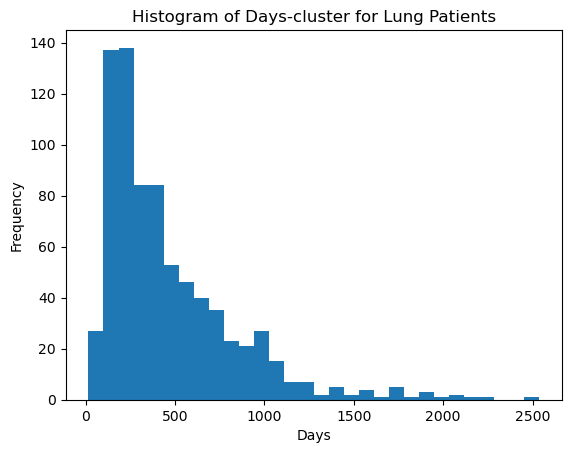

795.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                   738.0                   885.0


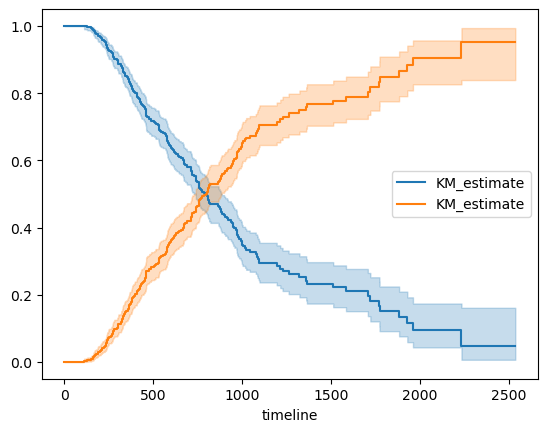

In [13]:
affinity_networks = snf.make_affinity(Lung_DB, metric=dist, K=20, mu=0.5)
fused_network = snf.snf(affinity_networks, K=20)
best, _ = snf.get_n_clusters(fused_network)

Lung_labels = spectral_clustering(fused_network, n_clusters=best)
Lung_All     = {'vha_id': Lung_patients    , 'cluster': list(Lung_labels) }
df_lung = pd.DataFrame(Lung_All)

Lung_survival = pd.merge(df_lung, survival0, on='vha_id')

data = Lung_survival

T = data['Days']
E = data['state']

plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Histogram of Days-cluster for Lung Patients')
plt.hist(T, bins = 30)
plt.show()

kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot()

kmf.plot_cumulative_density()

kmf.median_survival_time_

from lifelines.utils import median_survival_times

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

# 3 Clusters for Lung

2 3
Number of patients in cluser 0 = 320
Number of patients in cluser 1 = 255
Number of patients in cluser 2 = 198
868.0
     Cluster 2_lower_0.95  Cluster 2_upper_0.95
0.5                 740.0                1023.0
P-value = (0,1) 0.7255548456977534
P-value = (0,2) 0.4292201288197024
P-value = (1,2) 0.49486281333299464


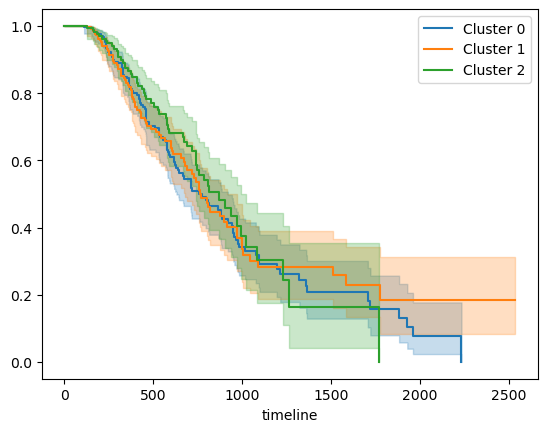

In [14]:
affinity_networks = snf.make_affinity(Lung_DB, metric=dist, K=20, mu=0.5)
fused_network = snf.snf(affinity_networks, K=20)
best, second = snf.get_n_clusters(fused_network)
print(best, second)
Lung_labels = spectral_clustering(fused_network, n_clusters=3)
Lung_All     = {'vha_id': Lung_patients    , 'cluster': list(Lung_labels) }
df_lung = pd.DataFrame(Lung_All)

Lung_survival = pd.merge(df_lung, survival0, on='vha_id')

clusters = Lung_survival['cluster'].unique()
groups = dict(tuple(Lung_survival.groupby('cluster')))

for i in range(len(groups)):
    print(f'Number of patients in cluser {i} = {len(groups[i])}')
    
    
Ts = [groups[i]['Days'] for i in range(len(groups))]
Es = [groups[i]['state'] for i in range(len(groups))]

kmf = KaplanMeierFitter()
for i in range(len(groups)):
    kmf.fit(durations = Ts[i], event_observed = Es[i], label=f'Cluster {i}')
    kmf.plot()

#kmf.plot_cumulative_density()

kmf.median_survival_time_

from lifelines.utils import median_survival_times

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

import itertools

# Generate all combinations of length 2 from a list of integers
numbers = [i for i in range(len(groups))]
combinations = itertools.combinations(numbers, 2)

# Perform the log-rank test
for i, j in combinations:
    results = logrank_test(groups[i]['Days'], groups[j]['Days'], event_observed_A=groups[i]['state'], event_observed_B=groups[j]['state'])
    print(f'P-value = ({i},{j})', results.p_value)

# 4 clusters for Lung

2 3
Number of patients in cluser 0 = 200
Number of patients in cluser 1 = 219
Number of patients in cluser 2 = 196
Number of patients in cluser 3 = 158
806.0
     Cluster 3_lower_0.95  Cluster 3_upper_0.95
0.5                 720.0                1023.0
P-value = (0,1) 0.4999999714861303
P-value = (0,2) 0.8401013533176822
P-value = (0,3) 0.739910040124447
P-value = (1,2) 0.4583931903915549
P-value = (1,3) 0.9734709621580783
P-value = (2,3) 0.6912178091805685


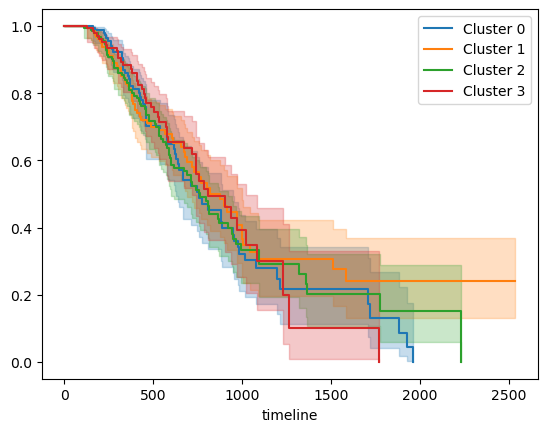

In [15]:
affinity_networks = snf.make_affinity(Lung_DB, metric=dist, K=20, mu=0.5)
fused_network = snf.snf(affinity_networks, K=20)
best, second = snf.get_n_clusters(fused_network)
print(best, second)
Lung_labels = spectral_clustering(fused_network, n_clusters=4)
Lung_All     = {'vha_id': Lung_patients    , 'cluster': list(Lung_labels) }
df_lung = pd.DataFrame(Lung_All)

Lung_survival = pd.merge(df_lung, survival0, on='vha_id')

clusters = Lung_survival['cluster'].unique()
groups = dict(tuple(Lung_survival.groupby('cluster')))

for i in range(len(groups)):
    print(f'Number of patients in cluser {i} = {len(groups[i])}')
    
    
Ts = [groups[i]['Days'] for i in range(len(groups))]
Es = [groups[i]['state'] for i in range(len(groups))]

kmf = KaplanMeierFitter()
for i in range(len(groups)):
    kmf.fit(durations = Ts[i], event_observed = Es[i], label=f'Cluster {i}')
    kmf.plot()

#kmf.plot_cumulative_density()

kmf.median_survival_time_

from lifelines.utils import median_survival_times

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

import itertools

# Generate all combinations of length 2 from a list of integers
numbers = [i for i in range(len(groups))]
combinations = itertools.combinations(numbers, 2)

# Perform the log-rank test
for i, j in combinations:
    results = logrank_test(groups[i]['Days'], groups[j]['Days'], event_observed_A=groups[i]['state'], event_observed_B=groups[j]['state'])
    print(f'P-value = ({i},{j})', results.p_value)

# Clusters of Prostate

In [16]:
fused_network = euclidean_distances(Prostate_DB[0])
best, second = snf.get_n_clusters(fused_network)

Prostate_labels = spectral_clustering(fused_network, n_clusters=2)
Prostate_All = {'vha_id': Prostate_patients, 'cluster': list(Prostate_labels)}
df_prostate = pd.DataFrame(Prostate_All)

Prostate_survival = pd.merge(df_prostate, survival0, on='vha_id')


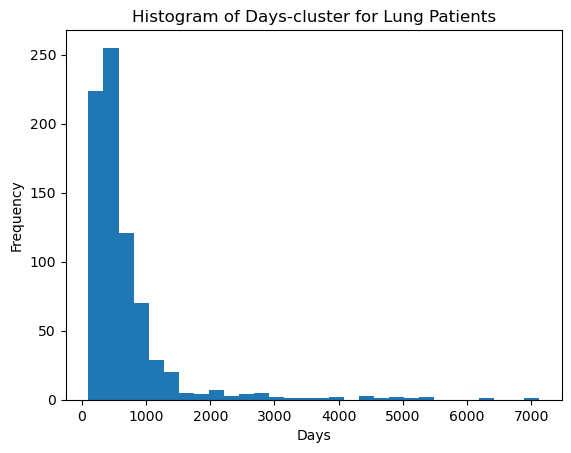

inf
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                     inf                     inf


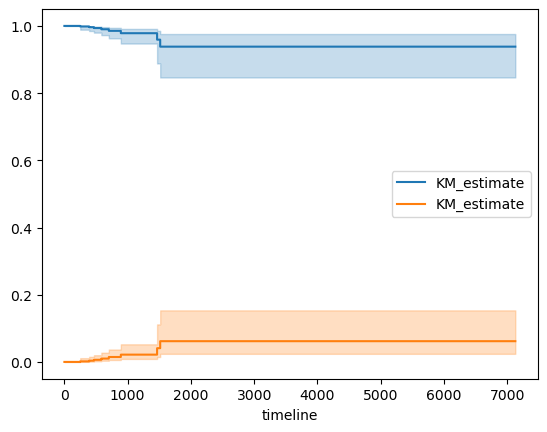

In [17]:
data = Prostate_survival

T = data['Days']
E = data['state']


plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Histogram of Days-cluster for Lung Patients')
plt.hist(T, bins = 30)
plt.show()

kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot()

kmf.plot_cumulative_density()

kmf.median_survival_time_

from lifelines.utils import median_survival_times

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

Number of patients in cluser 0 = 764
Number of patients in cluser 1 = 1
inf
     Cluster 1_lower_0.95  Cluster 1_upper_0.95
0.5                   inf                   inf
P-value = (0,1) 1.0


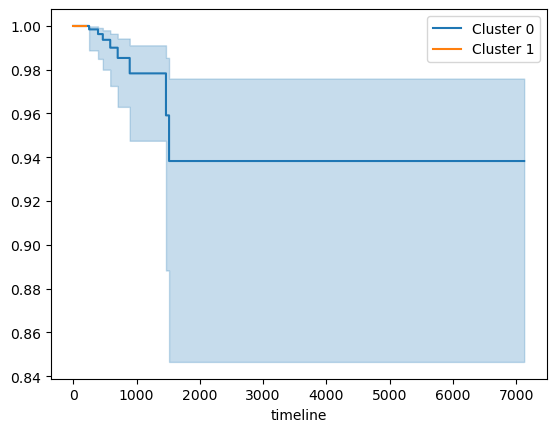

In [18]:
groups = dict(tuple(Prostate_survival.groupby('cluster')))

for i in range(len(groups)):
    print(f'Number of patients in cluser {i} = {len(groups[i])}')
    
    
Ts = [groups[i]['Days'] for i in range(len(groups))]
Es = [groups[i]['state'] for i in range(len(groups))]

kmf = KaplanMeierFitter()
for i in range(len(groups)):
    kmf.fit(durations = Ts[i], event_observed = Es[i], label=f'Cluster {i}')
    kmf.plot()

#kmf.plot_cumulative_density()

kmf.median_survival_time_

from lifelines.utils import median_survival_times

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

import itertools

# Generate all combinations of length 2 from a list of integers
numbers = [i for i in range(len(groups))]
combinations = itertools.combinations(numbers, 2)

# Perform the log-rank test
for i, j in combinations:
    results = logrank_test(groups[i]['Days'], groups[j]['Days'], event_observed_A=groups[i]['state'], event_observed_B=groups[j]['state'])
    print(f'P-value = ({i},{j})', results.p_value)